In [1]:
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath("../"))

from scripts.split_to_nix import split_currency_columns
from scripts.rename import rename_and_add_id
from scripts.convert_ds_to_date import convert_ds_to_date
from scripts.plot_time_series import plot_time_series
from scripts.aggregate_monthly_avg import aggregate_monthly_avg
from scripts.to_float import convert_y_to_float
from scripts.save_to_parquet import save_to_parquet

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("../data/algodao/algodao.csv")

In [4]:
df.head(10)

,Data,À vista R$,À vista US$
0,28/06/1996,"80,43","80,1"
1,01/07/1996,"80,14","79,82"
2,02/07/1996,"80,14","79,74"
3,03/07/1996,"80,01","79,63"
4,04/07/1996,"79,94","79,59"
5,05/07/1996,"79,84","79,52"
6,08/07/1996,"79,83","79,5"
7,09/07/1996,"79,36","78,96"
8,10/07/1996,"79,14","78,72"
9,11/07/1996,"78,96","78,57"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7139 entries, 0 to 7138
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         7139 non-null   object
 1   À vista R$   7139 non-null   object
 2   À vista US$  7139 non-null   object
dtypes: object(3)
memory usage: 167.4+ KB


In [6]:
df_brl, df_usd = split_currency_columns(df)

In [7]:
df_brl.head(10)

,Data,À vista R$
0,28/06/1996,"80,43"
1,01/07/1996,"80,14"
2,02/07/1996,"80,14"
3,03/07/1996,"80,01"
4,04/07/1996,"79,94"
5,05/07/1996,"79,84"
6,08/07/1996,"79,83"
7,09/07/1996,"79,36"
8,10/07/1996,"79,14"
9,11/07/1996,"78,96"


In [8]:
df_usd.head(10)

,Data,À vista US$
0,28/06/1996,"80,1"
1,01/07/1996,"79,82"
2,02/07/1996,"79,74"
3,03/07/1996,"79,63"
4,04/07/1996,"79,59"
5,05/07/1996,"79,52"
6,08/07/1996,"79,5"
7,09/07/1996,"78,96"
8,10/07/1996,"78,72"
9,11/07/1996,"78,57"


In [9]:
cols_dict_brl = {
    'Data': 'ds',
    'À vista R$': 'y'
}

cols_dict_usd = {
    'Data': 'ds',
    'À vista US$': 'y'
}

In [10]:
unique_id = 'ALGODAO'
df_brl = rename_and_add_id(df_brl, cols_dict_brl, unique_id)
df_usd = rename_and_add_id(df_usd, cols_dict_usd, unique_id)

In [11]:
df_brl.head(10)

,ds,y,unique_id
0,28/06/1996,"80,43",ALGODAO
1,01/07/1996,"80,14",ALGODAO
2,02/07/1996,"80,14",ALGODAO
3,03/07/1996,"80,01",ALGODAO
4,04/07/1996,"79,94",ALGODAO
5,05/07/1996,"79,84",ALGODAO
6,08/07/1996,"79,83",ALGODAO
7,09/07/1996,"79,36",ALGODAO
8,10/07/1996,"79,14",ALGODAO
9,11/07/1996,"78,96",ALGODAO


In [12]:
df_usd.head(10)

,ds,y,unique_id
0,28/06/1996,"80,1",ALGODAO
1,01/07/1996,"79,82",ALGODAO
2,02/07/1996,"79,74",ALGODAO
3,03/07/1996,"79,63",ALGODAO
4,04/07/1996,"79,59",ALGODAO
5,05/07/1996,"79,52",ALGODAO
6,08/07/1996,"79,5",ALGODAO
7,09/07/1996,"78,96",ALGODAO
8,10/07/1996,"78,72",ALGODAO
9,11/07/1996,"78,57",ALGODAO


In [13]:
df_brl = convert_ds_to_date(df_brl)
df_usd = convert_ds_to_date(df_usd)

df_brl = convert_y_to_float(df_brl)
df_usd = convert_y_to_float(df_usd)

In [14]:
df_brl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7139 entries, 0 to 7138
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         7139 non-null   datetime64[ns]
 1   y          7139 non-null   float64       
 2   unique_id  7139 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 167.4+ KB


In [15]:
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7139 entries, 0 to 7138
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         7139 non-null   datetime64[ns]
 1   y          7139 non-null   float64       
 2   unique_id  7139 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 167.4+ KB


In [16]:
df_brl = aggregate_monthly_avg(df_brl)
df_usd = aggregate_monthly_avg(df_usd)

In [17]:
df_brl.head(10)

,ds,y,unique_id
0,1996-06-01,80.430000,ALGODAO
1,1996-07-01,79.011739,ALGODAO
2,1996-08-01,78.564091,ALGODAO
3,1996-09-01,82.340952,ALGODAO
4,1996-10-01,86.280455,ALGODAO
5,1996-11-01,87.372000,ALGODAO
6,1996-12-01,88.070000,ALGODAO
7,1997-01-01,89.106818,ALGODAO
8,1997-02-01,89.500000,ALGODAO
9,1997-03-01,87.407895,ALGODAO


In [18]:
df_usd.head(10)

,ds,y,unique_id
0,1996-06-01,80.100000,ALGODAO
1,1996-07-01,78.481739,ALGODAO
2,1996-08-01,77.550909,ALGODAO
3,1996-09-01,80.812381,ALGODAO
4,1996-10-01,84.180455,ALGODAO
5,1996-11-01,84.817000,ALGODAO
6,1996-12-01,84.940000,ALGODAO
7,1997-01-01,85.469091,ALGODAO
8,1997-02-01,85.324444,ALGODAO
9,1997-03-01,82.731579,ALGODAO


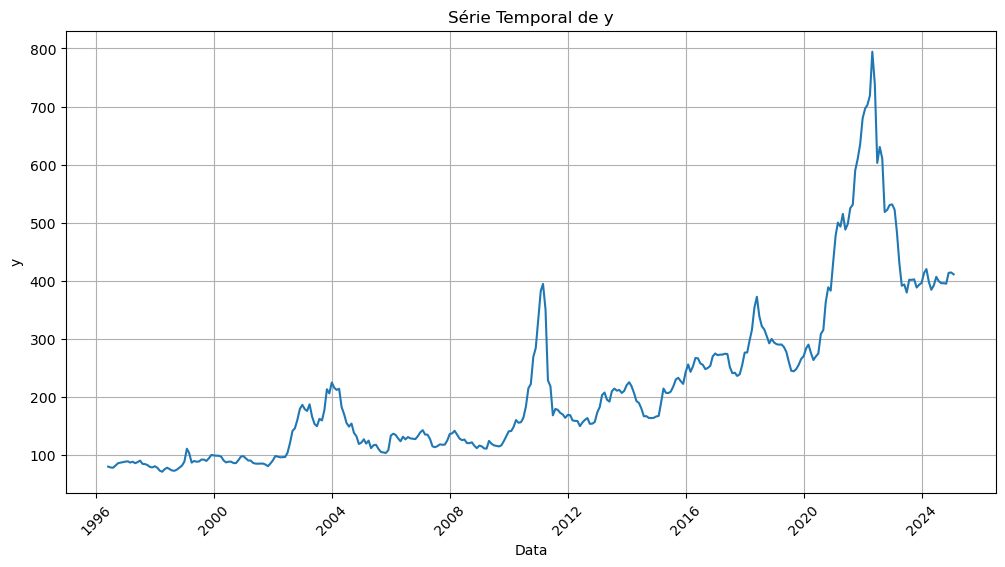

In [19]:
plot_time_series(df_brl, 'y')

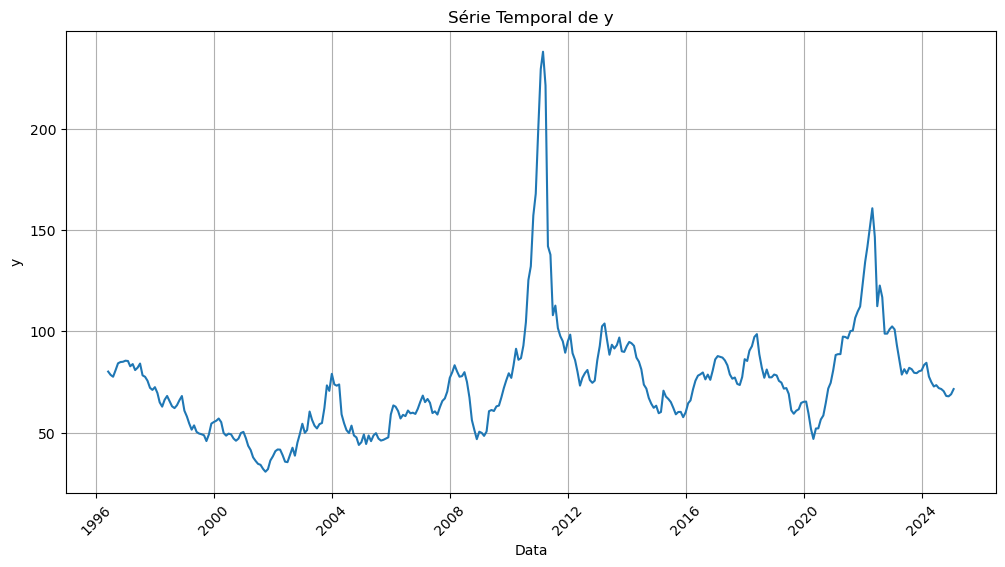

In [20]:
plot_time_series(df_usd, 'y')

In [21]:
save_to_parquet(df_brl, "../data/algodao/algodao_brl.parquet")
save_to_parquet(df_usd, "../data/algodao/algodao_usd.parquet")

Arquivo salvo em: ../data/algodao/algodao_brl.parquet
Arquivo salvo em: ../data/algodao/algodao_usd.parquet
